--------
## Step 1: Pseudocode
[Latex Source](https://www.overleaf.com/6663695rcdbbh#/22616031/)

--------
## Step 2: Simulations & Details of Their Parameters

##### Success
- A set of EEG Data that we can automatically select the dimension to reduce for, and successfully reduce them to that dimension.

##### Failure
- A random matrix in which the eigenvalues aren't far apart, and will be better if we inspected and chose the dimensions accordingly instead of auto elbow selection.

-------
## Step 3: Choose Visualization
We will use a scatter plot in which the EEG data are shown- the pre-PCA graph and the post-PCA graph will be shown on the same plot. Correctly reduced PCA graphs will have less of a fluctuation. Also, we graph the amount of dimensions or the "eigenvalues" and check if the manual selection of elbows using common sense will match our automatic selection.

-------
## Step 4: Specify Metrics for Evaluating Performance
We will use the *truth* function, which returns 1 if values match and 0 if they do not. Because cluster value is arbitrary, we will first sort the clusters to be in ascending order based on their center.

------
## Step 5: Write Code Generating Simulated Data

### Success (EEG Data)

In [4]:
import numpy as np
import h5py
import pandas as pd 

f = h5py.File('Documents/full_A00051826_01.mat', 'r')
data1 = np.array((f['result']['data']))
data_range = data1[500:1000,1];
data1 = pd.DataFrame(data=data1[1:20000,1:],    # values
              index=data1[1:20000,0],    # 1st column as index
              columns=data1[0,1:]) 

### Failure (Random Matrix)

In [25]:
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
data = np.random.rand(15,10)
data = pd.DataFrame(data=data[1:,1:],    # values
              index=data[1:,0],    # 1st column as index
              columns=data[0,1:]) 

----------
## Step 7: Plot Simulated Data

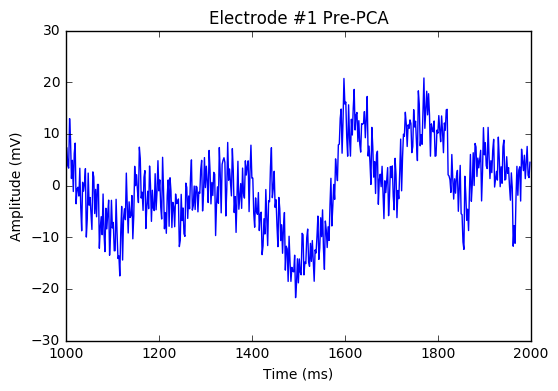

In [5]:
import matplotlib.pyplot as plt

x = range(1000,2000,2)
plt.plot(x, data_range)
plt.title('Electrode #1 Pre-PCA')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')

plt.show()

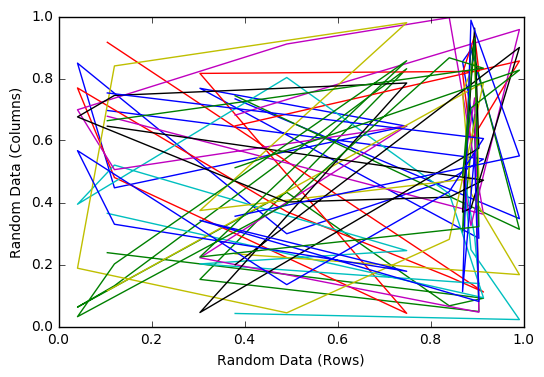

In [27]:
plt.plot(data)
plt.xlabel('Random Data (Rows)')
plt.ylabel('Random Data (Columns)')
plt.show()

---------
## Step 8: Write Algorithm Code

In [41]:
import sklearn

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets
from scipy import stats
from sklearn.preprocessing import scale

X = data1.values
X = scale(X)
pca = PCA(n_components=109)
pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

In [42]:
from matplotlib import pyplot as mp
import numpy as np
import math

def gaussian(x, mu, sig):
    return 1./(math.sqrt(2.*math.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

array = var
array2 = [x * 1000 for x in array] 

p = len(array2)
totalSum = [0]*(p-1)

for q in range(1,p):
    FirstArray, SecondArray = np.split(array2, [q,])
    mu1 = np.mean(FirstArray)
    mu2 = np.mean(SecondArray)
    s1 = np.var(FirstArray)
    s2 = np.var(SecondArray)
    if q-1 == 0:
        s1 = 0
    totalvariance = (((q-1)*(s1*s1)) + ((p-q-1)*(s2*s2))) / (p-2)
    Sum1 = 0
    Sum2 = 0
    for i in range(len(FirstArray)):
        x = FirstArray[i]
        x1 = np.log10(gaussian(x, mu1, totalvariance))
        Sum1 += x1
    for j in range(len(SecondArray)):
        y = SecondArray[j]
        y1 = np.log10(gaussian(y, mu2, totalvariance))
        Sum2 += y1
    totalSum[q-1] = Sum1 + Sum2

dimension = np.argmax(totalSum) + 1
print dimension
#for mu, sig in [(-1, 1), (0, 2), (2, 3)]:
#   mp.plot(gaussian(np.linspace(-3, 3, 120), mu, sig))

#mp.show()

2


In [78]:
W = data.values
W = scale(W)
pcafail = PCA(n_components=9)
pcafail.fit(W)
varfail = pcafail.explained_variance_ratio_

#The amount of variance that each PC explains
failarray= varfail
failarray2 = [x * 1000 for x in failarray] 

p = len(failarray2)
totalSum1 = [0]*(p-1)

for q in range(1,p):
    FirstArray, SecondArray = np.split(failarray2, [q,])
    mu1 = np.mean(FirstArray)
    mu2 = np.mean(SecondArray)
    s1 = np.var(FirstArray)
    s2 = np.var(SecondArray)
    if q-1 == 0:
        s1 = 0
    totalvariance = (((q-1)*(s1*s1)) + ((p-q-1)*(s2*s2))) / (p-2)
    Sum1 = 0
    Sum2 = 0
    for i in range(len(FirstArray)):
        x = FirstArray[i]
        x1 = np.log10(gaussian(x, mu1, totalvariance))
        Sum1 += x1
    for j in range(len(SecondArray)):
        y = SecondArray[j]
        y1 = np.log10(gaussian(y, mu2, totalvariance))
        Sum2 += y1
    totalSum1[q-1] = Sum1 + Sum2
    
dimension1 = np.argmax(totalSum1) + 1
print dimension1

8
4


------
## Step 9: Write Qualitative Evaluation Code

### Success

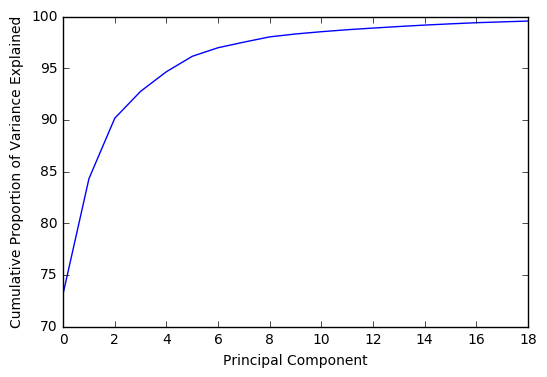

In [43]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1[1:20])
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Proportion of Variance Explained")
plt.show()

### Failure

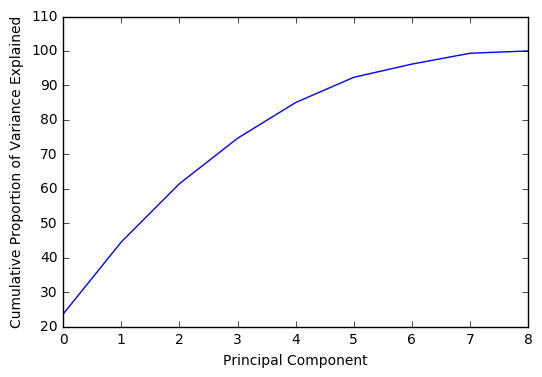

In [70]:
var2=np.cumsum(np.round(failarray, decimals=4)*100)

plt.plot(var2)
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Proportion of Variance Explained")
plt.show()

-------
## Step 11: Run + Quantitatively + Qualitatively Evaluate Simulation

### Success

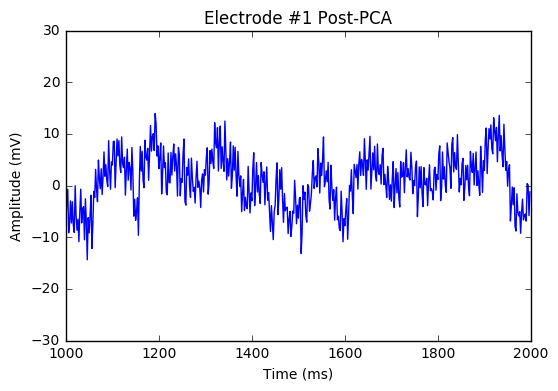

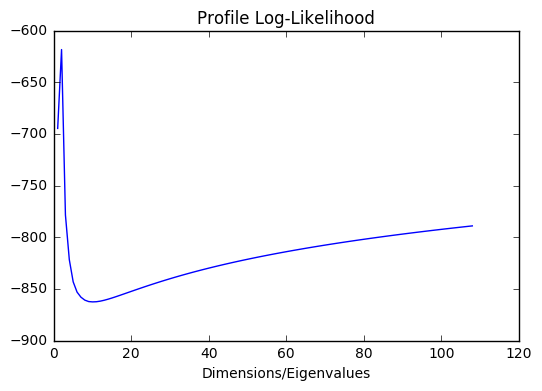

In [80]:
pca = PCA(n_components=2)
pca.fit(X)
Y = pca.fit_transform(X)

y_range = Y[500:1000, 1];
x1 = range(1000,2000,2)
plt.plot(x1, y_range)
plt.title('Electrode #1 Post-PCA')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')
plt.axis([1000,2000,-30,30])
plt.show()

numbers=range(1,109)
plt.plot(numbers,totalSum)
plt.title('Profile Log-Likelihood')
plt.xlabel('Dimensions/Eigenvalues')
plt.show()

### Failure

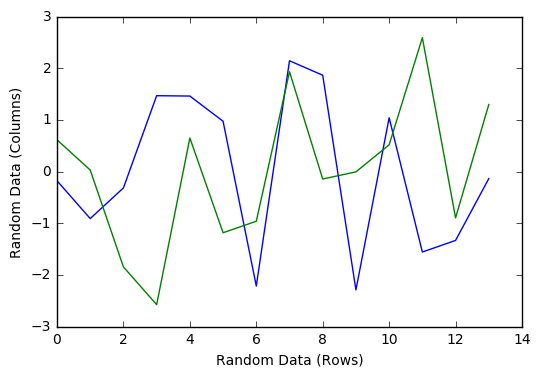

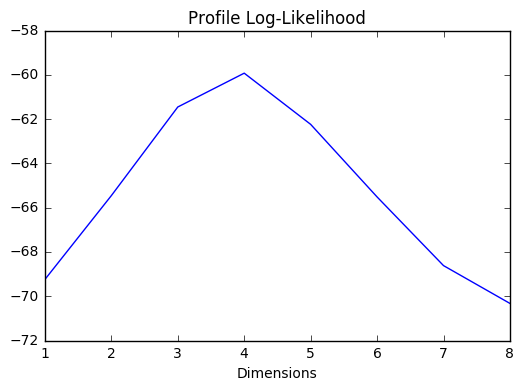

In [79]:
pcafail = PCA(n_components=4)
pcafail.fit(W)
V = pca.fit_transform(W)
v_range = V[0:1,1];

plt.plot(V)
plt.xlabel('Random Data (Rows)')
plt.ylabel('Random Data (Columns)')
plt.show()

numbers1=range(1,9)
plt.plot(numbers1,totalSum1)
plt.title('Profile Log-Likelihood')
plt.xlabel('Dimensions')
plt.show()

-------
## Step 13: Simulation Assessment
The algorithm performed as I anticipated on the simulated data, so it appears as though my understanding was good.